In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Instructions for updating:
non-resource variables are not supported in the long term


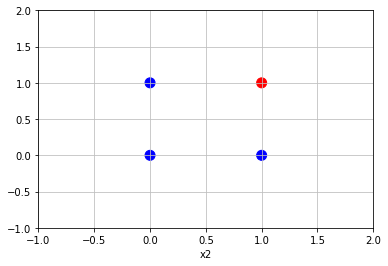

In [2]:
x1_data = np.array([0,1,0,1])
x2_data = np.array([0,0,1,1])
z_data = np.array([0,0,0,1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([-1,2,-1,2])
ax.grid(True, linestyle='-', color='0.75')
ax.scatter(x1_data,x2_data, s=100, c=z_data, cmap = cm.bwr)
plt.xlabel('x1')
plt.xlabel('x2')
fig.canvas.draw()

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Instructions for updating:
keep_dims is deprecated, use keepdims instead


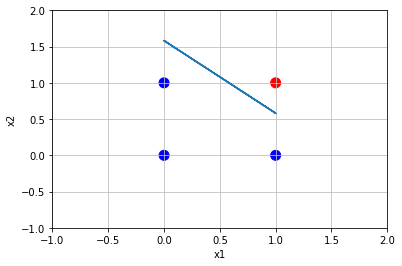

In [5]:
x1_data = np.array([0,1,0,1])
x2_data = np.array([0,0,1,1])
z_data  = np.array([0,0,0,1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([-1,2,-1,2])
ax.grid(True, linestyle='-', color='0.75')
ax.scatter(x1_data, x2_data, s=100, c=z_data, cmap=cm.bwr)
plt.xlabel('x1')
plt.ylabel('x2')
fig.canvas.draw()

def make_one_hot(data):
    classes = sorted(list(set(data)))
    num_samples = len(data)
    num_classes = len(classes)
    one_hot_data = np.zeros([num_samples, num_classes])
    for i,d in enumerate(data):
        one_hot_data[i, classes.index(d)] = 1
    return one_hot_data

use_one_hot = True

x_data = np.array(list(zip(x1_data, x2_data)))
z_data = make_one_hot(z_data) if use_one_hot else z_data.reshape([-1,1])

print(x_data)
print(z_data)

num_inputs = x_data.shape[1]
num_outputs = z_data.shape[1]

x_input = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs])
z_target = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs])

W = tf.Variable(0.01*tf.random_normal(shape=[num_inputs, num_outputs], dtype=tf.float32))
B = tf.Variable(tf.zeros([num_outputs], dtype=tf.float32))

logits = tf.add(tf.matmul(x_input, W), B)

if use_one_hot:
    preds = tf.exp(logits)/tf.reduce_sum(tf.exp(logits), axis=1, keep_dims=True)
    # preds = tf.nn.softmax(logits)
    error = tf.multiply(-tf.log(tf.maximum(preds,0.001)), z_target)
else:
    preds = 1/(1 + tf.exp(-logits))
    # preds = tf.nn.sigmoid(logits)
    error = tf.square(tf.subtract(preds, z_target))

loss = tf.reduce_sum(error)

train_op = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    iterations = 100
    for i in range(iterations):
        w_out, b_out, _ = sess.run([W, B, train_op], feed_dict={x_input: x_data.astype(float), z_target: z_data.astype(float)})
        
        if use_one_hot:
            w1 = w_out[0][1]
            w2 = w_out[1][1]
            b = b_out[1]
        else:
            w1 = w_out[0]
            w2 = w_out[1]
            b = b_out[0]
        
        x2_next = (w1*x1_data + b)/-w2
        
        line, = plt.plot(x1_data, x2_next)
        fig.canvas.draw()
        line.remove()
        
line, = plt.plot(x1_data, x2_next)
fig.canvas.draw()